## 构建一个简单的ChatBot
> 使用LangChain、LangGraph

**官方文档：** https://python.langchain.com/docs/tutorials/chatbot/

### 环境准备
安装LangGraph和LangSmith，具体指令：`conda install langgraph langsmith -n ai-agent`
#### LangGraph与LangSmith简介
TODO：待整理

### 样例

#### 第一步：设置环境变量

In [1]:
import getpass
import os

os.environ["DEEPSEEK_API_KEY"] = getpass.getpass("请输入DeepSeek的API Key:")

请输入DeepSeek的API Key: ········


#### 第二步：初始化大模型实例

In [2]:
from langchain_deepseek import ChatDeepSeek

llm = ChatDeepSeek(model='deepseek-chat', temperature=0.2, max_retries=2)

#### 第三步：构建一个有状态的图

In [3]:
from langgraph.graph import START, END, MessagesState, StateGraph
from langgraph.checkpoint.memory import MemorySaver

# 定义一个动作
def call_model(state: MessagesState):
    response = llm.invoke(state["messages"])
    return {"messages": response}

# 定义工作流（图）
workflow = StateGraph(state_schema=MessagesState)
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")
workflow.add_edge("model", END)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

TODO：待整理相关知识点
* MemorySaver
* MessagesState
* StateGraph

问题点：
* 图类型有哪些，已定义的节点类型有哪些？

使用工具展示工作流（图）的图结构

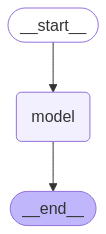

In [4]:
# 打印工作流结构
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

#### 第四步：通过多个用户的多轮对话测试记忆功能

问题点：
* Memory是如何工作的？

In [5]:
user_1_config = {"configurable": {"thread_id": "user-001"}}
user_2_config = {"configurable": {"thread_id": "user-002"}}

In [6]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

In [7]:
# 用户[user-001]的第1轮对话
input_message = HumanMessage("你好，我是李晓毅")
input_message.pretty_print()
output_messages_state = app.invoke({"messages": [input_message]}, user_1_config)
output_messages_state["messages"][-1].pretty_print()

# 用户[user-001]的第2轮对话
input_message = HumanMessage("请问我的名字是什么？")
input_message.pretty_print()
output_messages_state = app.invoke({"messages": [input_message]}, user_1_config)
output_messages_state["messages"][-1].pretty_print()

# 用户[user-002]的第1轮对话
input_message = HumanMessage("你好，请问我是李晓毅吗？")
input_message.pretty_print()
output_messages_state = app.invoke({"messages": [input_message]}, user_2_config)
output_messages_state["messages"][-1].pretty_print()

================================ Human Message =================================

你好，我是李晓毅
================================== Ai Message ==================================

你好，李晓毅！很高兴认识你。😊 请问有什么可以帮你的吗？无论是闲聊、问题咨询，还是需要建议，我都会尽力协助～
================================ Human Message =================================

请问我的名字是什么？
================================== Ai Message ==================================

你的名字是**李晓毅**，刚刚你在对话开始时已经告诉我啦～ 😊  
如果还有其他问题或者需要帮忙的地方，随时告诉我哦！
================================ Human Message =================================

你好，请问我是李晓毅吗？
================================== Ai Message ==================================

你好！我无法确认你的身份，因为我无法访问个人信息或记忆之前的对话。如果你是李晓毅，可以告诉我你的需求，我会尽力帮助你；如果不是，也请告诉我你想咨询的问题，我会提供相应的支持。  

为了保护隐私和安全，建议不要在网络上随意透露个人敏感信息哦！
